# Librería

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Constante

In [2]:
COLORES = ["cornflowerblue", "mediumpurple", "indianred", "mediumseagreen", 'coral']


FILE_DATOS = './data/laguna_datos_horarios_rellenos.csv' 
FILE_HIST = './data/datos_historico.csv'

# Carga de datos

In [3]:
data_laguna = pd.read_csv(FILE_DATOS)

data_laguna['fecha'] = pd.to_datetime(data_laguna['fecha'])
data_laguna.set_index('fecha', inplace=True)
data_laguna.index = pd.DatetimeIndex(data_laguna.index, freq='h') 

data_laguna

C:\Users\Vir\AppData\Local\Temp\ipykernel_6256\2746564452.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_laguna['fecha'] = pd.to_datetime(data_laguna['fecha'])


,temperatura,ambiente,nivel
fecha,,,
2023-06-17 00:00:00,31.5000,22.000000,51.0
2023-06-17 01:00:00,31.4700,21.780000,51.0
2023-06-17 02:00:00,31.2350,21.201000,47.8
2023-06-17 03:00:00,31.2950,22.439250,52.0
2023-06-17 04:00:00,31.3750,23.058375,50.0
...,...,...,...
2023-09-12 20:00:00,31.5375,25.820000,34.0
2023-09-12 21:00:00,31.4325,25.310000,36.0
2023-09-12 22:00:00,31.3350,23.930000,35.0


In [4]:
data_hist = pd.read_csv(FILE_HIST)
data_hist['fecha'] = pd.to_datetime(data_hist['fecha'], format = "%d/%m/%Y")
data_hist.set_index('fecha', inplace=True)
# data_hist.sort_index(inplace=True)
# print(data_hist.head())

# # Verificar duplicados
# dias_faltantes = pd.date_range(start=data_hist.index.min(), end=data_hist.index.max(), freq='D').difference(data_hist.index)
# print("Días faltantes:", dias_faltantes)
# data_hist = data_hist.asfreq('D')

# data_hist['ambiente'] += (1 - data_hist['ambiente'].min())
# if data_hist['ambiente'].isnull().any():
#     data_hist['ambiente'].fillna(method='ffill')
# data_hist.dropna(inplace=True)
data_hist['ambiente'] += abs(data_hist['ambiente'].min()) + 1


data_hist.index = pd.DatetimeIndex(data_hist.index, freq='D') 

# Chequeo de estacionariedad

In [ ]:
def test_estacionariedad(data, column):
    result = adfuller(data[column])
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

    # Interpretación básica del resultado
    if result[1] < 0.05:
        print("La serie temporal es estacionaria.")
    else:
        print("La serie temporal no es estacionaria y puede necesitar diferenciación.")


## - Temperatura del agua

In [ ]:
test_estacionariedad(data_laguna, "temperatura")

## - Temperatura ambiente

In [ ]:
test_estacionariedad(data_laguna, "ambiente")

## - Nivel del agua

In [ ]:
test_estacionariedad(data_laguna, "nivel")

## - Histórico ambiente

In [ ]:
test_estacionariedad(data_hist, "ambiente")

# Descomposición de la serie temporal

In [ ]:
def descomponer_serie(data, column, modelo):
    resultado = seasonal_decompose(data[column], model=modelo)  
    resultado.plot()
    plt.show()

## - Temperatura del agua

In [ ]:
descomponer_serie(data_laguna, "temperatura", "multiplicative")

In [ ]:
descomponer_serie(data_laguna, "ambiente", "multiplicative")

In [ ]:
descomponer_serie(data_laguna, "nivel", "additive")

In [ ]:
descomponer_serie(data_hist, "ambiente", "multiplicative")

# Autocorrelación

In [ ]:
def autocorrelacion(data, column):
    plot_acf(data[column].dropna(), lags=20)
    plt.title('Función de Autocorrelación')
    plt.show()

    plot_pacf(data[column].dropna(), lags=20)
    plt.title('Función de Autocorrelación Parcial')
    plt.show()

## - Temperatura del agua

In [ ]:
autocorrelacion(data_laguna, "temperatura")

## - Temperatura ambiente

In [ ]:
autocorrelacion(data_laguna, "ambiente")

## - Nivel del agua

In [ ]:
autocorrelacion(data_laguna, "nivel")

## - Histórico ambiente

In [ ]:
autocorrelacion(data_hist, "ambiente")

# Graficas de líneas

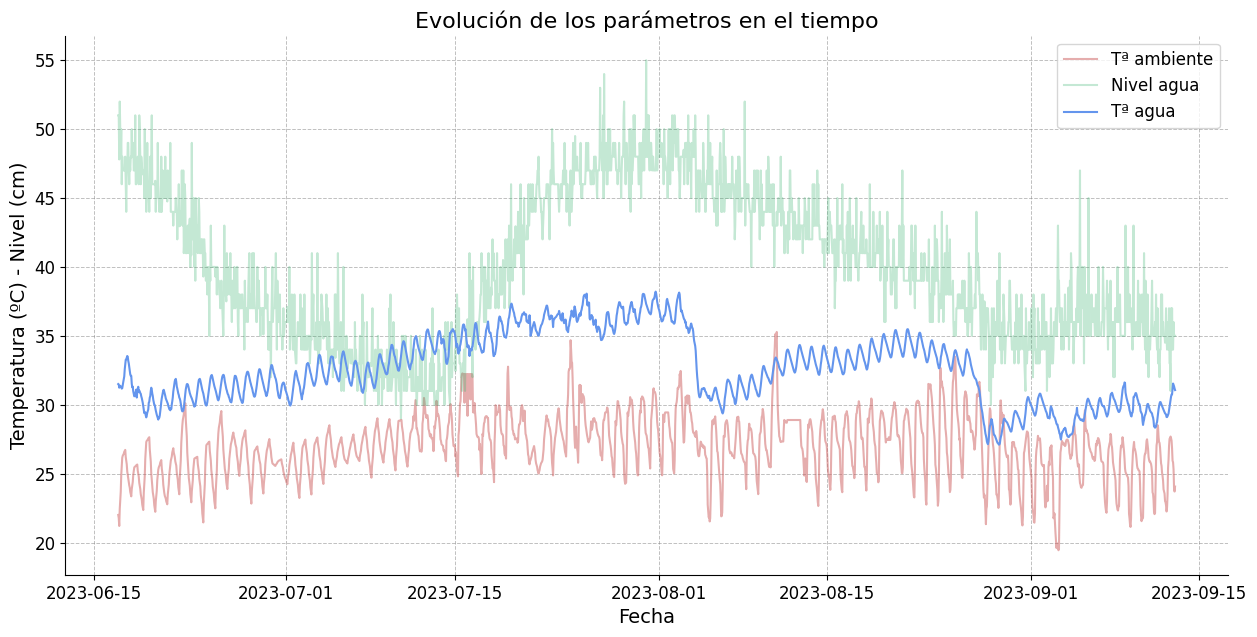

In [5]:

# Configuración del gráfico
plt.figure(figsize=(15, 7))
# Gráfico de dispersión para 'fondo', 'superficie' y 'ambiente'

plt.plot(data_laguna.index, data_laguna['ambiente'], label='Tª ambiente',color = COLORES[2], alpha = 0.5)
plt.plot(data_laguna.index, data_laguna['nivel'], label='Nivel agua', color = COLORES[3], alpha = 0.3)
plt.plot(data_laguna.index, data_laguna['temperatura'], label='Tª agua', color = COLORES[0])

# Configuración de los ejes y títulos
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Temperatura (ºC) - Nivel (cm)', fontsize=14)
plt.title(f'Evolución de los parámetros en el tiempo', fontsize=16)

# Quitar los bordes superior y derecho
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=12)

# Ajustar el tamaño de las etiquetas de los ejes
ax.tick_params(axis='both', which='major', labelsize=12)

# Configurar la cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='grey', alpha = 0.5)

# Guardar el gráfico en una carpeta con buena resolución
plt.savefig(f"evolucion.png", dpi=300, bbox_inches='tight')
plt.show()

In [18]:
data_laguna

,temperatura,ambiente,nivel
fecha,,,
2023-06-17 00:00:00,31.5000,22.000000,51.0
2023-06-17 01:00:00,31.4700,21.780000,51.0
2023-06-17 02:00:00,31.2350,21.201000,47.8
2023-06-17 03:00:00,31.2950,22.439250,52.0
2023-06-17 04:00:00,31.3750,23.058375,50.0
...,...,...,...
2023-09-12 20:00:00,31.5375,25.820000,34.0
2023-09-12 21:00:00,31.4325,25.310000,36.0
2023-09-12 22:00:00,31.3350,23.930000,35.0


C:\Users\Vir\AppData\Local\Temp\ipykernel_6256\4191585652.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dates1 = pd.to_datetime(dates1)
C:\Users\Vir\AppData\Local\Temp\ipykernel_6256\4191585652.py:15: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dates2 = pd.to_datetime(dates2)


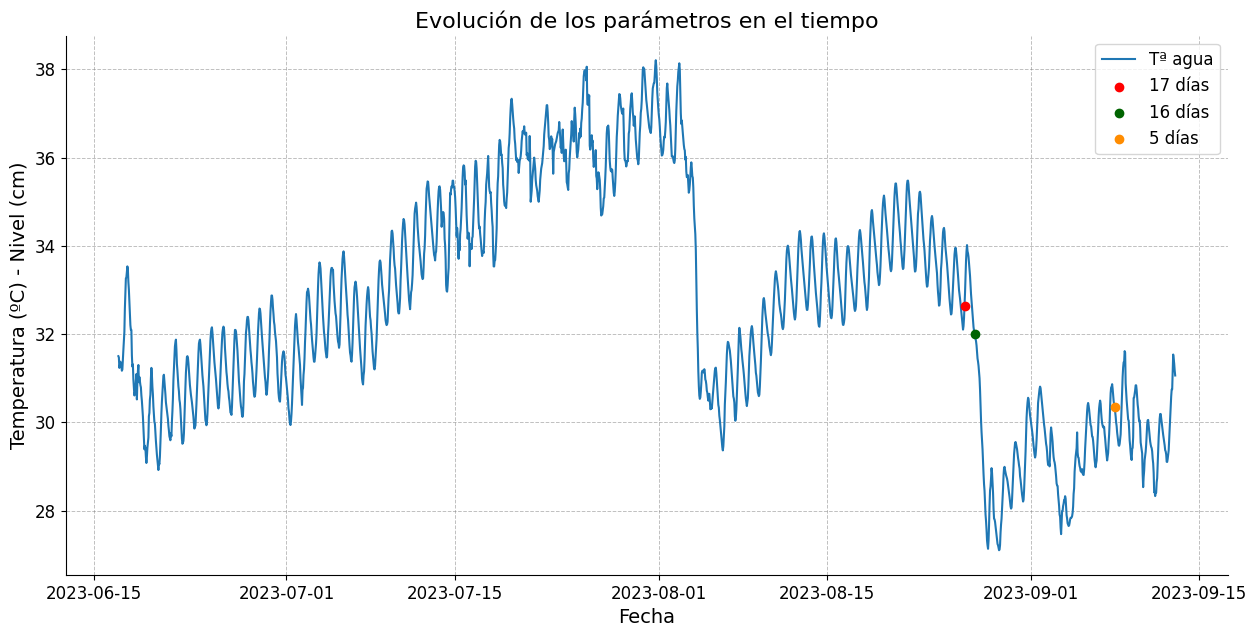

In [21]:

# Configuración del gráfico
plt.figure(figsize=(15, 7))
# Gráfico de dispersión para 'fondo', 'superficie' y 'ambiente'

# plt.plot(data_laguna.index, data_laguna['ambiente'], label='Tª ambiente',color = COLORES[2], alpha = 0.5)
# plt.plot(data_laguna.index, data_laguna['nivel'], label='Nivel agua', color = COLORES[3], alpha = 0.3)
plt.plot(data_laguna.index, data_laguna['temperatura'], label='Tª agua')#, color = COLORES[0])
# Añadir los puntos en las posiciones especificadas
dates1 = ["26/08/2023 11:00"]
dates1 = pd.to_datetime(dates1)
temperatures1 = [data_laguna.loc[date, 'temperatura'] for date in dates1]
plt.scatter(dates1, temperatures1, color='crimson', zorder=5, label='17 días')

dates2 = ["27/08/2023 7:00"]
dates2 = pd.to_datetime(dates2)
temperatures2 = [data_laguna.loc[date, 'temperatura'] for date in dates2]
plt.scatter(dates2, temperatures2, color='seagreen', zorder=5, label='16 días')

dates3 = ["2023-09-07 23:00"]
dates3 = pd.to_datetime(dates3)
temperatures3 = [data_laguna.loc[date, 'temperatura'] for date in dates3]
plt.scatter(dates3, temperatures3, color='gold', zorder=5, label='5 días')

# Configuración de los ejes y títulos
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Temperatura (ºC) - Nivel (cm)', fontsize=14)
plt.title(f'Evolución de los parámetros en el tiempo', fontsize=16)

# Quitar los bordes superior y derecho
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=12)

# Ajustar el tamaño de las etiquetas de los ejes
ax.tick_params(axis='both', which='major', labelsize=12)

# Configurar la cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='grey', alpha = 0.5)

# Guardar el gráfico en una carpeta con buena resolución
plt.savefig(f"dataset3.png", dpi=300, bbox_inches='tight')
plt.show()